# Smart Housing Advisor
Tri Blankley and Kassidy Maberry

2025/05/06

Data provided by Redfin, a national real estate brokerage.

Link: https://www.redfin.com/news/data-center

In [1]:
import pandas as pd
import matplotlib.pyplot as mlp
import seaborn as sb
# Import plotly

"""
Loads plot data.
"""
def load_data():
    d = pd.read_csv("city_market_tracker.tsv000", sep="\t")
    d["PERIOD_BEGIN"] = pd.to_datetime(d["PERIOD_BEGIN"])
    d["PERIOD_END"] = pd.to_datetime(d["PERIOD_END"])
    # TODO: Convert dates into datatime.
    return d

data = load_data()
print("Data has loaded")

Data has loaded


In [9]:
print(data.keys())

Index(['PERIOD_BEGIN', 'PERIOD_END', 'PERIOD_DURATION', 'REGION_TYPE',
       'REGION_TYPE_ID', 'TABLE_ID', 'IS_SEASONALLY_ADJUSTED', 'REGION',
       'CITY', 'STATE', 'STATE_CODE', 'PROPERTY_TYPE', 'PROPERTY_TYPE_ID',
       'MEDIAN_SALE_PRICE', 'MEDIAN_SALE_PRICE_MOM', 'MEDIAN_SALE_PRICE_YOY',
       'MEDIAN_LIST_PRICE', 'MEDIAN_LIST_PRICE_MOM', 'MEDIAN_LIST_PRICE_YOY',
       'MEDIAN_PPSF', 'MEDIAN_PPSF_MOM', 'MEDIAN_PPSF_YOY', 'MEDIAN_LIST_PPSF',
       'MEDIAN_LIST_PPSF_MOM', 'MEDIAN_LIST_PPSF_YOY', 'HOMES_SOLD',
       'HOMES_SOLD_MOM', 'HOMES_SOLD_YOY', 'PENDING_SALES',
       'PENDING_SALES_MOM', 'PENDING_SALES_YOY', 'NEW_LISTINGS',
       'NEW_LISTINGS_MOM', 'NEW_LISTINGS_YOY', 'INVENTORY', 'INVENTORY_MOM',
       'INVENTORY_YOY', 'MONTHS_OF_SUPPLY', 'MONTHS_OF_SUPPLY_MOM',
       'MONTHS_OF_SUPPLY_YOY', 'MEDIAN_DOM', 'MEDIAN_DOM_MOM',
       'MEDIAN_DOM_YOY', 'AVG_SALE_TO_LIST', 'AVG_SALE_TO_LIST_MOM',
       'AVG_SALE_TO_LIST_YOY', 'SOLD_ABOVE_LIST', 'SOLD_ABOVE_LIST_MOM',
 

# Task 1: User Input

In [16]:
income = float(input("Enter your annual income: "))
downPay = float(input("Enter your down payment: "))
prefered = input("Enter your prefered city (optional): ")

Enter your annual income:  32000
Enter your down payment:  2000
Enter your prefered city (optional):  c


# Task 2: Affordability Estimation

In [17]:
monthlyBudget = (income * .3)/12
loanDur = int(input("Enter a loan duration in months: "))
houseBudget = downPay + monthlyBudget * loanDur
out = data[data["MEDIAN_SALE_PRICE"] <= houseBudget]
out = out[["MEDIAN_SALE_PRICE", "CITY"]]
print("You can afford houses from the following cities.")
print(out)

Enter a loan duration in months:  60


You can afford houses from the following cities.
         MEDIAN_SALE_PRICE             CITY
103                35777.0       Hartshorne
107                20000.0  Cedar Glen West
108                19109.0       Hagerstown
110                20000.0    Fairmont City
117                32750.0         Bellaire
...                    ...              ...
5818610            35500.0      Marine City
5818620            31450.0           Elnora
5818656            18000.0     Sylvan Beach
5818678            49550.0    Richmondville
5818729            43000.0           Ashley

[251170 rows x 2 columns]


# Task 3: Market Trend Analysis

Enter your prefered city (optional):  Chicago


/tmp/ipykernel_4437/2437183324.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market["PERIOD_YEAR"] = market["PERIOD_BEGIN"].dt.year
/tmp/ipykernel_4437/2437183324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market["PERIOD_MONTH"] = market["PERIOD_BEGIN"].dt.month


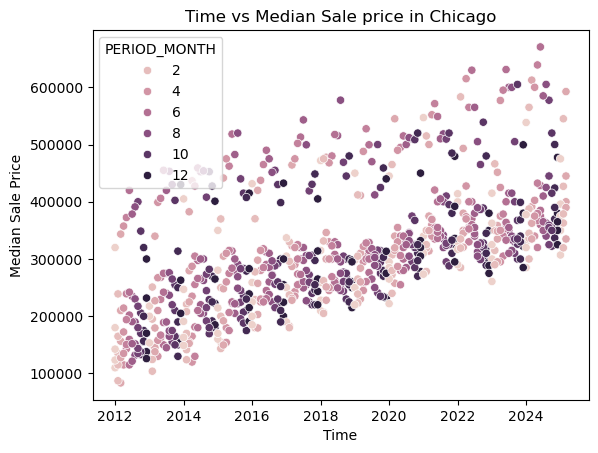

In [8]:
city = input("Enter your prefered city (optional): ")
market = data[data["CITY"] == city]
if market.size == 0:
    print("Unknown city defaulting to all")
    market = data
    city = ""
else:
    city = " in " + city

# TODO: Fix copy warning
market["PERIOD_YEAR"] = market["PERIOD_BEGIN"].dt.year
market["PERIOD_MONTH"] = market["PERIOD_BEGIN"].dt.month
sb.scatterplot(market, x="PERIOD_BEGIN", y="MEDIAN_SALE_PRICE", hue="PERIOD_MONTH")
mlp.xlabel("Time")
mlp.ylabel("Median Sale Price")
mlp.title(f"Time vs Median Sale price{city}")
mlp.show()

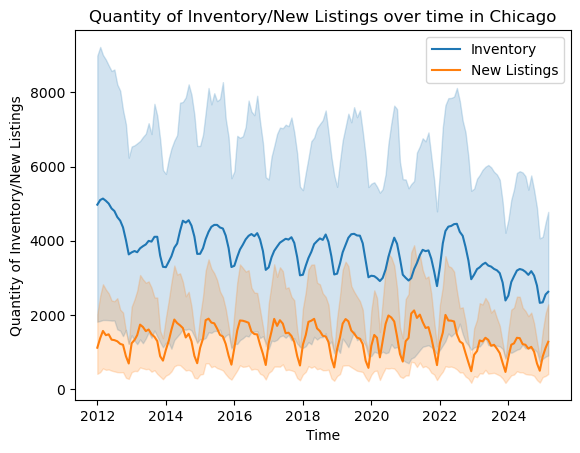

In [13]:
sb.lineplot(market, x="PERIOD_BEGIN", y="INVENTORY", label="Inventory")
sb.lineplot(market, x="PERIOD_BEGIN", y="NEW_LISTINGS", label="New Listings")
mlp.ylabel("Quantity of Inventory/New Listings")
mlp.xlabel("Time")
mlp.title(f"Quantity of Inventory/New Listings over time{city}")
mlp.show()

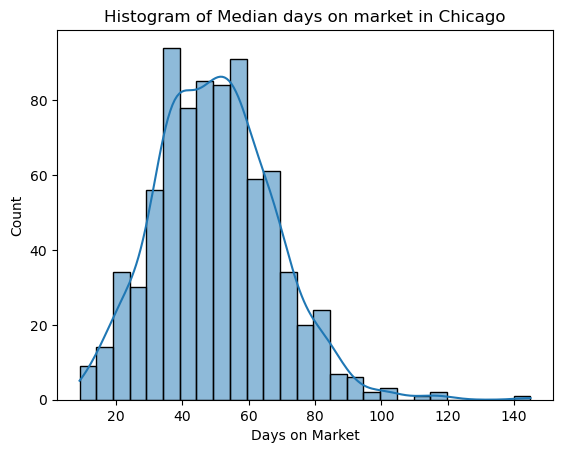

In [12]:
sb.histplot(market, x="MEDIAN_DOM", kde=True)
mlp.title(f"Histogram of Median days on market{city}")
mlp.xlabel("Days on Market")
mlp.show()

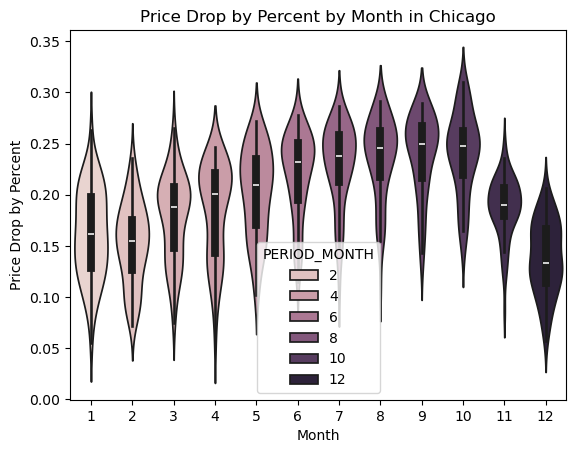

In [11]:
sb.violinplot(market, x="PERIOD_MONTH", y="PRICE_DROPS", hue="PERIOD_MONTH")
mlp.title(f"Price Drop by Percent by Month{city}")
mlp.xlabel("Month")
mlp.ylabel("Price Drop by Percent")
mlp.show()

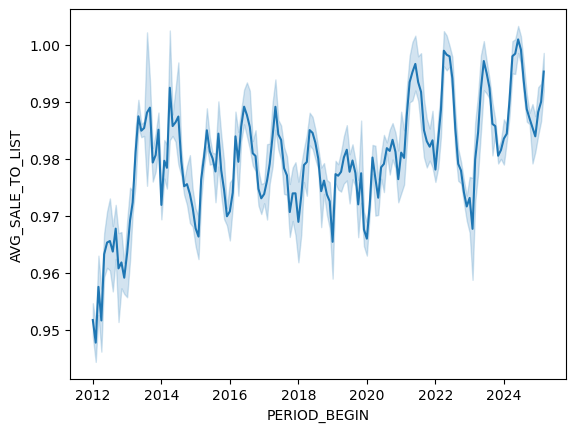

In [43]:
sb.lineplot(market, x="PERIOD_BEGIN", y="AVG_SALE_TO_LIST")
mlp.show()

# Task 4: Generate Insights

In [28]:
print(f"Your estimated house budget is ${houseBudget}")

out = data[data["MEDIAN_SALE_PRICE"] <= houseBudget]
out = out[["CITY", "STATE_CODE"]]
vals = out.values
val = int(input("How many cities do you want to print?"))
i = 0
print("Places that fit your budget:")
for c in vals:
    print(f"{c[0]}, {c[1]}")
    i += 1
    if i == val:
        break
if i == 0:
    print("We searched far and wide but no cities fit your budget.")

# Where to buy and not buy.

Your estimated house budget is $50000.0


How many cities do you want to print? 5


Places that fit your budget:
Hartshorne, OK
Cedar Glen West, NJ
Hagerstown, IN
Fairmont City, IL
Bellaire, OH
